Examines how the tunable $k_1$ and $k_2$ parameters effect the pickup and dropoff probabilities.

In [11]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

In [12]:
def perceived_fraction(kernel):
    return np.count_nonzero(kernel) / kernel.size

def pickup_probability(f, k1):
    return (k1 / (k1 + f)) ** 2

def dropoff_probability(f, k2):
    return 2 * f if f < k2 else 1

In [13]:
def gen_kernel(radius, items):
    width = 2 * radius + 1
    
    kernel = np.zeros(width ** 2, dtype=bool)
    indices = np.random.choice(width ** 2, items, replace=False)
    kernel[indices] = True
    return kernel.reshape(width, width)

In [14]:
def plot_summary(radius):
    kernels = [
        gen_kernel(radius=radius, items=i)
        for i in range((2 * radius + 1) ** 2 + 1)
    ]
    fractions = [perceived_fraction(k) for k in kernels]

    for k1 in [0.01, 0.05, 0.1, 0.2]:
        pickups = [pickup_probability(f, k1) for f in fractions]
        plt.plot(range((2 * radius + 1) ** 2 + 1), pickups, label=f"$k1={k1}$")

    plt.xlabel("neighbors")
    plt.ylabel("pickup probability")
    plt.title(f"Pickup Probability ($r={radius}$)")
    plt.legend()
    plt.savefig(f"k1-r{radius}.eps")
    plt.show()

    for k2 in [0.1, 0.2, 0.3, 0.5]:
        dropoffs = [dropoff_probability(f, k2) for f in fractions]
        plt.plot(range((2 * radius + 1) ** 2 + 1), dropoffs, label=f"$k2={k2}$")

    plt.xlabel("neighbors")
    plt.ylabel("dropoff probability")
    plt.title(f"Dropoff Probability ($r={radius}$)")
    plt.legend()
    plt.savefig(f"k2-r{radius}.eps")
    plt.show()

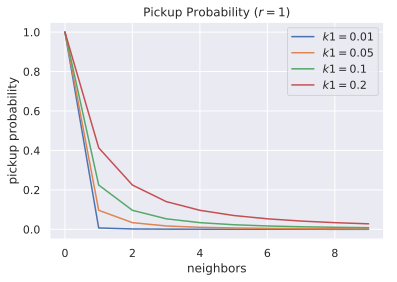

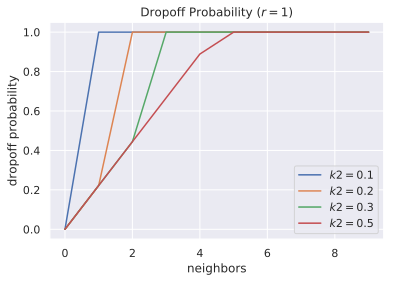

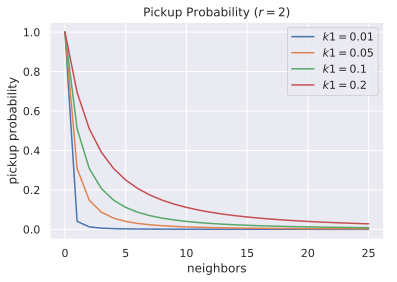

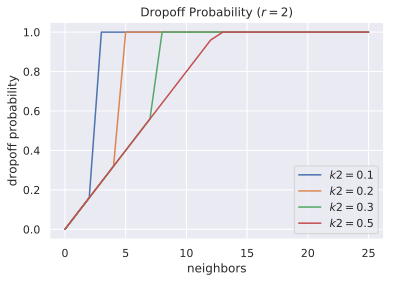

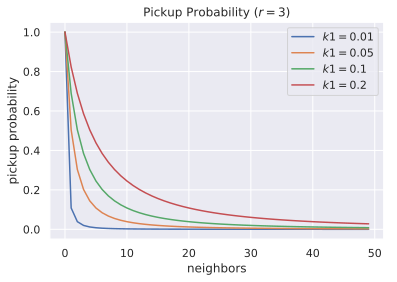

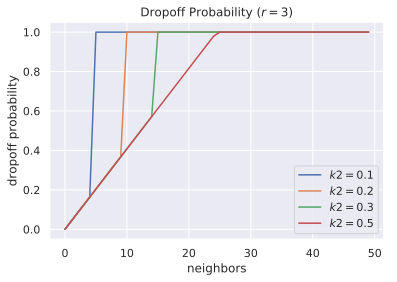

In [15]:
for r in [1, 2, 3]:
    plot_summary(r)

So from this we can see that both $k_1$ and $k_2$ should be smaller for bigger neighborhoods.